In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

#libraries for models
from sklearn.linear_model import LinearRegression

# Preprocessing 

In [3]:
df = pd.read_csv('cars update.csv', index_col=[0])

In [4]:
df.head(2)

,index,id,url,region,region_url,price,years old,year,manufacturer,model,...,drive,size,type,paint_color,image_url,description,condition_group,manufacturer_country,fuel_group,Group
0,367220,7077273973,https://wilmington.craigslist.org/ctd/d/wilmin...,wilmington,https://wilmington.craigslist.org,3445,14,2008,honda,civic sdn,...,fwd,NaN,sedan,unknown,https://images.craigslist.org/00W0W_kQ9AwNoGDo...,2008 Honda Civic Sdn LX *Sedan* Drive it ho...,excellent/good,Japanese,Gas/Diesel,excellent condition Japanese Gas/Diesel car
1,487667,7079602589,https://lexington.craigslist.org/cto/d/beattyv...,lexington,https://lexington.craigslist.org,12000,29,1993,ram,350,...,unknown,NaN,truck,unknown,https://images.craigslist.org/00G0G_o0gBgzn5Ol...,"1993 ton 4 x 4 diesel Dodge power ram 350, man...",excellent/good,American,Gas/Diesel,NaN


In [5]:
print(df['condition_group'].value_counts())

excellent/good    5812
new/like new      1870
salvage/fair       121
Name: condition_group, dtype: int64


In [6]:
df = df[['years old', 'odometer', 'fuel', 'manufacturer', 'manufacturer_country', 'fuel_group', 'paint_color', 'condition_group', 'transmission', 'title_status','price']]

In [7]:
features = ['years old', 'odometer','fuel', 'manufacturer', 'manufacturer_country', 'fuel_group', 'paint_color', 'condition_group', 'transmission', 'title_status','price']

In [8]:
num_col = ['years old', 'odometer']
cat_cols= ['manufacturer_country','fuel','odometer', 'manufacturer','manufacturer_country','fuel_group', 'paint_color', 'condition_group', 'transmission', 'title_status']

In [9]:
le=preprocessing.LabelEncoder()

In [10]:
df[cat_cols]=df[cat_cols].apply(le.fit_transform)

In [11]:
df

,years old,odometer,fuel,manufacturer,manufacturer_country,fuel_group,paint_color,condition_group,transmission,title_status,price
0,14,5976,2,13,2,1,10,0,0,0,3445
1,29,5975,0,29,0,1,10,0,1,0,12000
2,20,5974,0,34,3,1,10,0,1,0,29000
3,18,5973,2,11,0,1,10,0,0,0,2300
4,22,5972,0,10,0,1,6,0,0,0,8000
...,...,...,...,...,...,...,...,...,...,...,...
7798,36,0,5,6,0,2,3,1,3,0,45988
7799,12,0,2,11,0,1,10,1,0,0,3700
7800,9,0,2,10,0,1,9,0,0,0,9499
7801,6,0,2,34,3,1,9,1,3,0,46500


In [12]:
from sklearn.cluster import KMeans

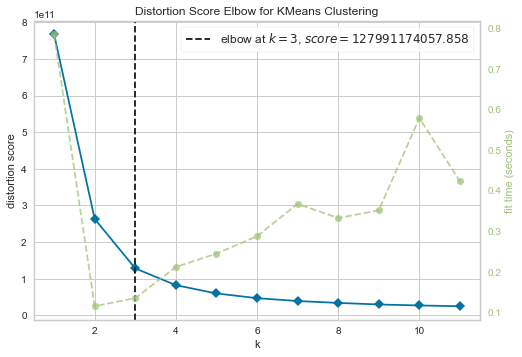

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)

In [15]:
df['clusters'] = kmeans.labels_

In [16]:
#0.75 R2 on decision tree with these
#columns_titles = ['manufacturer_country', 'manufacturer', 'fuel', 'paint_color', 'odometer', 'condition_group','clusters','transmission', 'title_status','price']

In [17]:
columns_titles = ['manufacturer_country', 'manufacturer', 'years old', 'fuel', 'paint_color', 'odometer', 'condition_group','clusters','transmission', 'title_status','price']

In [18]:
df=df.reindex(columns=columns_titles)

In [19]:
#scaling target variable
#q1,q3=(df['price'].quantile([0.25,0.75]))
#o1=q1-1.5*(q3-q1)
#o2=q3+1.5*(q3-q1)
#df=df[(df.price>=o1) & (df.price<=o2)]

In [20]:
#function to split dataset int training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)


In [21]:
X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

# Linear Regression


In [22]:
#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

In [23]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [24]:
y_pred = [0 if i < 0 else i for i in y_pred]

In [25]:
y_pred

[19557.069444915698,
 1193.11116093272,
 16017.291822661937,
 18171.79682191946,
 8168.340645808908,
 23489.774328472115,
 22525.694277109877,
 9059.575356366731,
 0,
 18440.63553444043,
 11367.609231095495,
 15844.78874434658,
 12130.99778127786,
 24217.108019944688,
 21876.740780616878,
 6747.442891824907,
 11521.886033464518,
 22987.715361016333,
 10174.337665457599,
 5394.045411847506,
 10876.259986336088,
 7749.585097210416,
 17344.025028975935,
 6662.9513239702865,
 19658.607925644297,
 18412.555774370558,
 24635.124719771105,
 20808.795090848027,
 17429.752149042473,
 16075.949928786147,
 7566.112382516709,
 18589.46966725425,
 4639.677169338454,
 16626.67421712605,
 16559.22224217968,
 9287.189261567619,
 4683.167111930987,
 19845.595623958554,
 10042.857550331748,
 20171.832916146876,
 19446.773451078032,
 12892.36129442012,
 5956.440798072021,
 680.0089007260867,
 9339.213150644598,
 23162.793172408983,
 9208.31915177879,
 20052.73516153661,
 2369.4386421453783,
 6853.7301727

In [26]:
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])   

In [27]:
r1_lr=result(y_test,y_pred)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-1.72437870e+03  6.51494734e+01 -5.07301014e+02 -2.87565101e+03
  6.27357627e+01 -1.37594595e+00  1.64846312e+03 -2.84025934e+03
  1.57895448e+02 -6.99993132e+02]
MSLE : 1.5045349202508356
Root MSLE : 1.2265948476374893
R2 Score : 0.507510369710394 or 50.751%


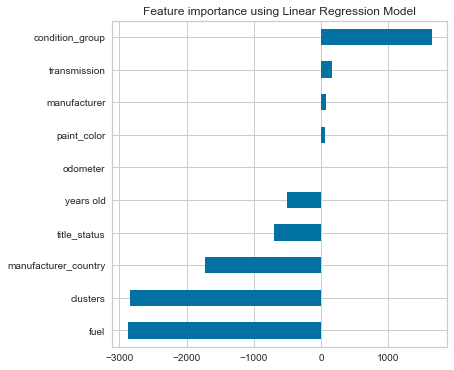

In [28]:
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

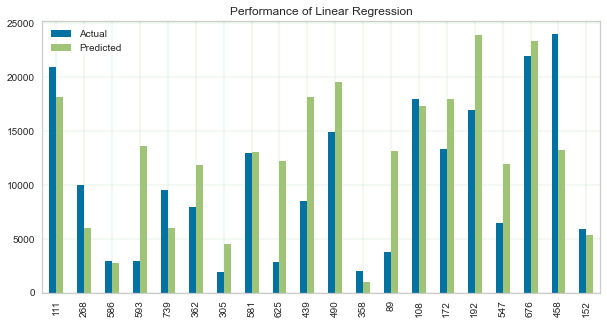

In [29]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')
plt.savefig('Linear-Regression-Performance')
plt.show()

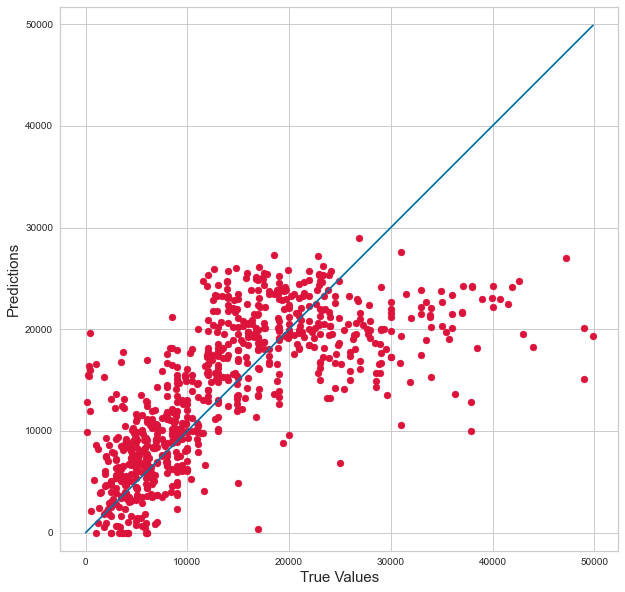

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error

In [32]:
#Decision Tree

model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
yhat = regr_trans.predict(X_test)

In [33]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.7849262559497707, 3214.450704225352, 4469.284769780628)

In [34]:
import dtreeviz.trees

In [35]:
feat_dict= {}
for col, val in sorted(zip(X_train.columns, dt.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val

In [36]:
feat_dict

{'clusters': 0.8497973330826792,
 'odometer': 0.06111011800173279,
 'years old': 0.026575795307741967,
 'manufacturer': 0.02172274349346646,
 'paint_color': 0.014757536585890666,
 'fuel': 0.007441559938793387,
 'condition_group': 0.006338131286761051,
 'manufacturer_country': 0.006026189945464543,
 'transmission': 0.003980223143911495,
 'title_status': 0.002250369213558511}

In [37]:
feat_df = pd.DataFrame.from_dict(feat_dict, orient='index')

In [38]:
feat_df.reset_index(inplace=True)

In [39]:
feat_df = feat_df.rename(columns={'index': 'Feature', 0: 'Importance'})

In [40]:
feat_df

,Feature,Importance
0,clusters,0.849797
1,odometer,0.061110
2,years old,0.026576
3,manufacturer,0.021723
4,paint_color,0.014758
5,fuel,0.007442
6,condition_group,0.006338
7,manufacturer_country,0.006026
8,transmission,0.003980
9,title_status,0.002250


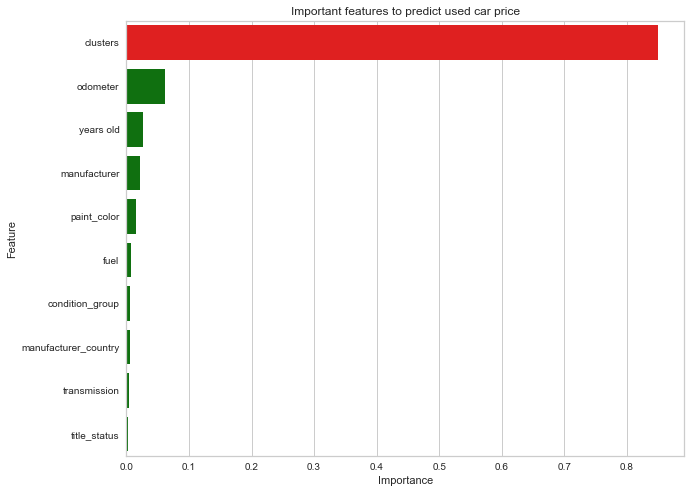

In [41]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict used car price')
plt.show()